In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
import os

ruta = os.path.join(os.getcwd(), "..", "..", "data", "processed", "peleas.parquet")
df = pd.read_parquet(ruta)
df.head()

,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,KD_A,KD_B,...,Victorias_Sub_A,Victorias_Sub_B,Victorias_Decision_A,Victorias_Decision_B,Derrotas_KO_A,Derrotas_KO_B,Derrotas_Sub_A,Derrotas_Sub_B,Derrotas_Decision_A,Derrotas_Decision_B
0,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,False,KO/TKO,412,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,False,Decision - Unanimous,180,2,1,0,...,0,0,1,0,0,0,0,0,0,1
2,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,False,Decision - Split,180,2,0,0,...,0,0,1,0,0,0,0,0,0,1
3,Bas Rutten,Tsuyoshi Kohsaka,1999-01-08,HEAVYWEIGHT,False,KO/TKO,135,2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,False,Submission,477,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [3]:
print("Columnas del DataFrame:")
print(df.columns)

Columnas del DataFrame:
Index(['Peleador_A', 'Peleador_B', 'DATE', 'CATEGORY', 'WINNER', 'METHOD',
       'TIME', 'ROUND', 'KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A',
       'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A',
       'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_x',
       'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y', 'TD_B_x', 'TD_B_y', 'STR_HEAD_A_x',
       'STR_HEAD_A_y', 'STR_HEAD_B_x', 'STR_HEAD_B_y', 'STR_BODY_A_x',
       'STR_BODY_A_y', 'STR_BODY_B_x', 'STR_BODY_B_y', 'STR_LEG_A_x',
       'STR_LEG_A_y', 'STR_LEG_B_x', 'STR_LEG_B_y', 'STR_DISTANCE_A_x',
       'STR_DISTANCE_A_y', 'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y',
       'STR_CLINCH_A_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y',
       'STR_GROUND_A_x', 'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y',
       'KD_DIFF', 'SIG_STR_DIFF', 'TD_DIFF', 'SUB_ATT_DIFF', 'REV_DIFF',
       'CTRL_DIFF', 'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B',
       'TITLE_F

In [4]:
print("\nTipos de datos:")
print(df.dtypes.to_string())


Tipos de datos:
Peleador_A                      object
Peleador_B                      object
DATE                    datetime64[ns]
CATEGORY                        object
WINNER                            bool
METHOD                          object
TIME                             int64
ROUND                           object
KD_A                             int64
KD_B                             int64
SIG_STR_A                      float64
SIG_STR_B                      float64
TD_PORC_A                      float64
TD_PORC_B                      float64
SUB_ATT_A                        int64
SUB_ATT_B                        int64
REV_A                            int64
REV_B                            int64
CTRL_A                           int64
CTRL_B                           int64
TOTAL_STR_A_x                    int64
TOTAL_STR_A_y                    int64
TOTAL_STR_B_x                    int64
TOTAL_STR_B_y                    int64
TD_A_x                           int64
TD_A_y  

## ANALÍSIS DESCRIPTIVO NÚMERICO

Realizamos un análisis descriptivo de las variables numéricas para comprender mejor sus distribuciones 
y las frecuencias con las que ocurren ciertos eventos en las peleas. Por ejemplo, observamos que el número 
de knockdowns (KD) suele ser 0 en la mayoría de los combates, mientras que el número total de golpes conectados
(TOTAL_STR_A_x) suele superar los 55.

Este análisis también nos permite verificar si la extracción y transformación de los datos se ha realizado 
correctamente. De hecho, detectamos que algunos porcentajes estaban guardándose en una escala de 0 a 100 en
lugar de 0 a 1, lo que pudimos corregir gracias a esta exploración descriptiva.

In [5]:
print("\nResumen estadístico de columnas numéricas:")
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))


Resumen estadístico de columnas numéricas:
        Peleador_A       Peleador_B                           DATE  \
count         7844             7844                           7844   
unique        1821             2276                            NaN   
top     Jim Miller  Jeremy Stephens                            NaN   
freq            35               21                            NaN   
mean           NaN              NaN  2016-08-07 22:49:08.291687680   
min            NaN              NaN            1999-01-08 00:00:00   
25%            NaN              NaN            2012-12-15 00:00:00   
50%            NaN              NaN            2017-03-18 00:00:00   
75%            NaN              NaN            2021-04-17 00:00:00   
max            NaN              NaN            2025-02-15 00:00:00   
std            NaN              NaN                            NaN   

           CATEGORY WINNER                METHOD         TIME ROUND  \
count          7773   7844                  

In [6]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)



Index(['TIME', 'KD_A', 'KD_B', 'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A',
       'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A',
       'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_A_y', 'TOTAL_STR_B_x',
       'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y', 'TD_B_x', 'TD_B_y', 'STR_HEAD_A_x',
       'STR_HEAD_A_y', 'STR_HEAD_B_x', 'STR_HEAD_B_y', 'STR_BODY_A_x',
       'STR_BODY_A_y', 'STR_BODY_B_x', 'STR_BODY_B_y', 'STR_LEG_A_x',
       'STR_LEG_A_y', 'STR_LEG_B_x', 'STR_LEG_B_y', 'STR_DISTANCE_A_x',
       'STR_DISTANCE_A_y', 'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y',
       'STR_CLINCH_A_x', 'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y',
       'STR_GROUND_A_x', 'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y',
       'KD_DIFF', 'SIG_STR_DIFF', 'TD_DIFF', 'SUB_ATT_DIFF', 'REV_DIFF',
       'CTRL_DIFF', 'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B',
       'Record_A', 'Record_B', 'Peleas_A', 'Peleas_B', 'Puntos_A', 'Puntos_B',
       'Racha_A', 'Racha_B', 'Victorias_KO_A

## ANALÍSIS DISTRIBUCIONES CON BOX-PLOT

Al mostrar los Box-Plot nos damos cuenta de que en muchos casos
existe una cola a la derecha ya que, por ejemplo en los intentos de derribo,
lo normal es que ocurran muy pocos concentrandose ahí la mayoría de los valores,
sin embargo en algunos combates ocurren mucho creando esa cola. Esto vemos que pasa con
bastantes variables. Para mejorar eso deberíamos estudiar realizar ciertas transformaciones.

También vemos gráficos en los cuales la distancia intercuartílica es mínima ya que, por ejemplo los knockdowns
o intentos de sumisión suelen no ocurrir ni una vez en los combates, esto se puede ver en el dataframe explicando
cada variable donde vemos que variables como los knockdowns (KD_A y KD_B) el 75% es 0 y tiene una media de 0.24,
haciendo que se queden esos gráficos tan raros con la caja prácticamente siendo una línea. En cuanto a estas variables
habrá que estudiar si aportan algo al crear el modelo al ser tan generales.

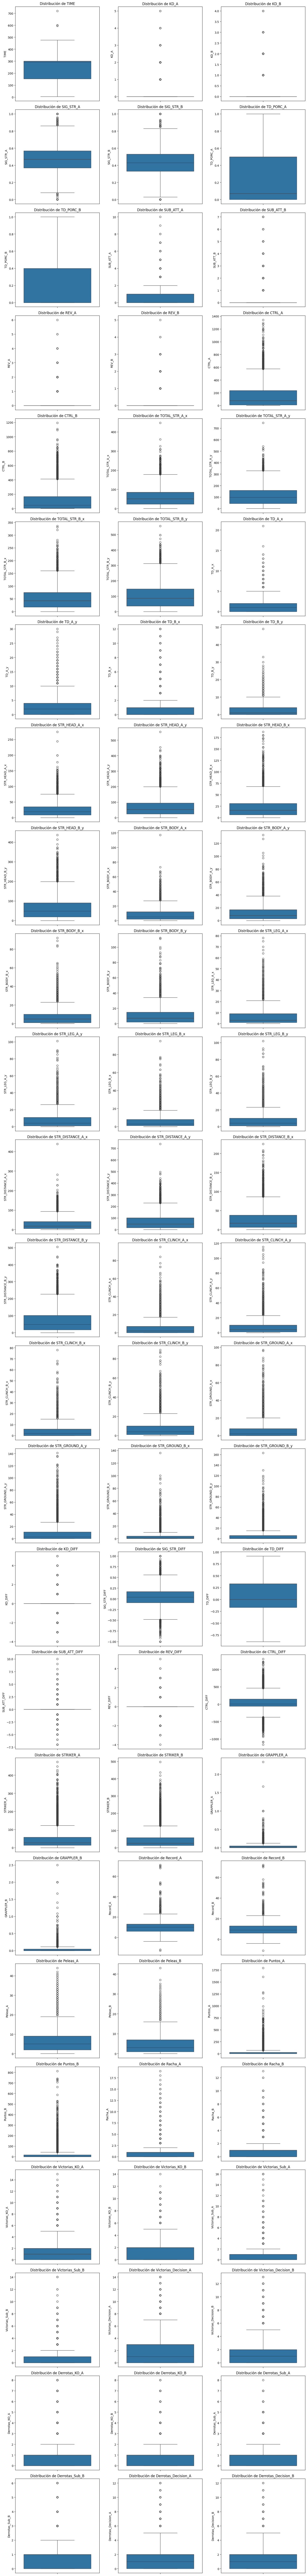

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Número de columnas
cols = 3

# Calcula el número de filas necesarias para los gráficos
rows = (len(numerical_columns) + cols - 1) // cols  # Redondeo hacia arriba

# Crear la figura
plt.figure(figsize=(5 * cols, 5 * rows))

# Crear los subgráficos
for i, col in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Definir filas y columnas
    sns.boxplot(y=df[col])  # Usar 'y' para boxplot en vertical
    plt.title(f"Distribución de {col}")

# Ajustar la disposición para que no se sobrepongan
plt.tight_layout()

# Mostrar la figura
plt.show()


## ANÁLISIS DISTRIBUCIONES CON HISTOGRAMAS

Como vemos en los histogramas las variables no siguen distribuciones normales
y predomina, como ya habíamos visto con los boxplots las colas hacía la derecha. Intentaremos
utilizar todos los datos ya que no parecen errores de la página y en caso de que sea un problema para el 
modelo eliminaremos algunos valores atípicos.

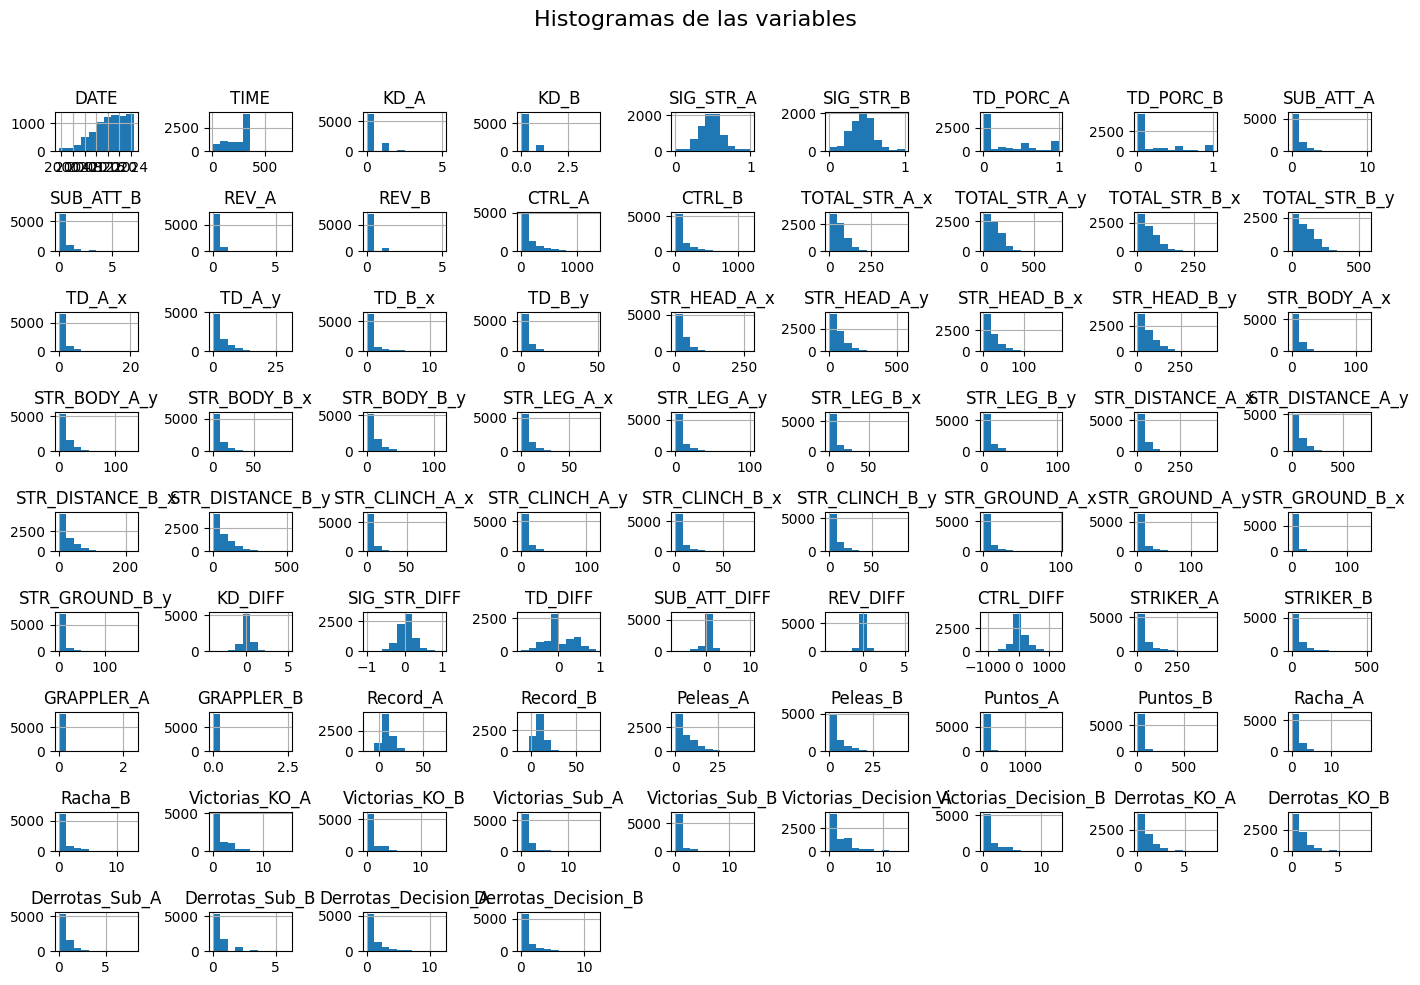

In [28]:
df.hist(figsize=(14, 10))
plt.suptitle("Histogramas de las variables", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()